# Perform an A/B Test for Ad Campaign using Python 

<img src="files/ab-testing.png" width="200">

<div>Icons made by <a href="https://flat-icons.com/" title="Flat Icons">Flat Icons</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>




<br>

<b>AB testing is essentially an experiment where two or more variants are evaluated by  statistical analysis to determine which variation performs better for a given conversion goal</b>
<br>

<b>You are hired by a digital marketing agency that designed a new ad for their client and This ad is hosted on a website .They hired you to do an A/B test to advise them on whether they should go for the new ad or not.</b>

## A. Load the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# Load the dataset
df = pd.read_excel('AB Test.xlsx')

In [3]:
#show the dataframe head
df.head()

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view


**Notes**: We observe that in the data we have two columns - `group` and `action`.
- In the column `group` we have information on which group did the user belong to (i.e. experiment group OR control group)
- In the column `action`, we have information on whether the user just viewed the Ad campagin or they viewed and clicked?

In [4]:
#show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


**Notes:** The data we have recieved is clean and there are no missing values!

# B. Set up the hypothesis testing steps

In [5]:
#find insights in our data
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

**Notes:** We have an almost equal split of participants in the experiment (a.k.a test group) and the control group

In [6]:
#find insights in our data
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

**Notes:**

**1. Experiment group:** 
- The group that is involved in the new experiment . i.e the group that received the new ad . 

**2. Control group:**
- The group that didn't receive the new ad

**3. Click-through rate (CTR):** 
- This is the metric we wish to study in this test. It is the number of clicks advertisers receive on their ads per number of impressions. We want to know whether the new ad campaign has an improved CTR or not?

## Hypothesis Testing steps:

**1) Specify the Null Hypothesis**
- In this project, the null hypothesis is that the click-through rate (CTR) for the new ad campaign is less than the current campaign
<br>

**2) Specify the Alternative Hypothesis**
- The alternative hypothesis is that the new ad campaign has a better CTR than the current ad campaign
<br>

**3) Set the Significance Level ($\alpha$)**
- In statistical tests, statistical significance is determined by citing an $\alpha$ level, or the probability of rejecting the null hypothesis when the null hypothesis is true. For this project, $\alpha$, or significance level, is set to **0.05 (5%)**.

## C. Compute the difference in the click-through rate (CTR)

In [7]:
# Get dataframe with all observations from the control group
control_df = df.query('group == "control"')

# Compute CTR for the control group 
control_ctr = control_df.query('action == "view and click"').index.nunique()/control_df.index.nunique()

# Display the CTR For the control group
print(f'The click-through rate for the current ad campaign in the control group is: {control_ctr:.4f}')

The click-through rate for the current ad campaign in the control group is: 0.1935


In [8]:
# Get dataframe with all records from the experiment group 
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group 
experiment_ctr = experiment_df.query('action == "view and click"').index.nunique()/experiment_df.index.nunique()

#Display the CTR For the experiment group
print(f'The click-through rate for the new ad campaign in the experiment group is: {experiment_ctr:.4f}')

The click-through rate for the new ad campaign in the experiment group is: 0.1659


In [9]:
#Compute the difference in the CTR between the two groups
diff = experiment_ctr - control_ctr

#display the difference
print(f'The difference in click-through rate between the two groups is: {diff:.4f}')

The difference in click-through rate between the two groups is: -0.0276


# D. Create sample distribution using bootsrapping

## Bootstrapping : 
The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.

## Example : 
Bootstrapping in statistics, means sampling with replacement.
so if we have a group of individuals and , and want to bootsrap sample of ten individuals from this group , we could randomly sample any ten individuals but with bootsrapping, we are sampling with replacement so we could actually end up sampling 7 out of the ten individuals and three of the previously selected individuals might end up being sampled again

<img src="files/Bootstrapping.png" width="600">

In [10]:
# Bootsrapping
# Here we will sample with replacement and measure the difference in CTR between the experiment group and the control group
differences=[]
size = df.shape[0]

for I in range(10000):
    sample = df.sample(size, replace = True)
    control_df = sample.query('group == "control"')
    experiment_df = sample.query('group == "experiment"')
    control_ctr = control_df.query('action == "view and click"').index.nunique() / control_df.index.nunique()
    experiment_ctr = experiment_df.query('action == "view and click"').index.nunique() / experiment_df.index.nunique()
    differences.append(experiment_ctr - control_ctr)

# E. Evaluate the null hypothesis and draw conclustions.

**The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.**

(array([  22.,  140.,  664., 1721., 2755., 2632., 1465.,  503.,   89.,
           9.]),
 array([-0.06209659, -0.05504038, -0.04798418, -0.04092797, -0.03387176,
        -0.02681555, -0.01975934, -0.01270314, -0.00564693,  0.00140928,
         0.00846549]),
 <BarContainer object of 10 artists>)

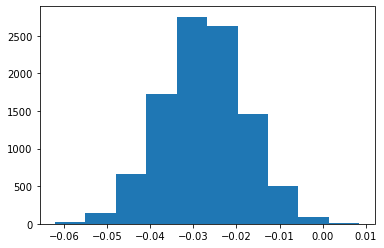

In [11]:
# Plotting the sampling distribution
differences = np.array(differences)
plt.hist(differences)

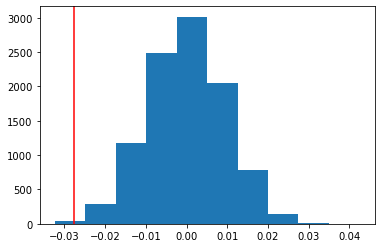

In [12]:
# Simulate the distribution under the null hypothesis 
null_hypothesis = np.random.normal(0,differences.std(), differences.size)

# Plot the null distribution and the difference in CTR observed for the sample
plt.hist(null_hypothesis)
plt.axvline(diff, c='red')

**Notes:**
- The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

- The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.

- i.e for P Value less than 0.05 we are 95% percent confident that we can reject the null hypothesis 

In [13]:
# Compute the  P-value 
(null_hypothesis > diff).mean()

0.9986

**Final Takeaways:**

- We fail to reject the null hypothesis since the p-value is not less than 0.05. Hence, the current ad campaign has a better CTR compared to the new ad campaign


- However, while conducting such tests, we should be aware of "Change Aversion" term. Change aversion is a negative short term reaction to changes in a product or service. It is natural but can be avoided or at least mitigated. This is why when introducing a new product or new ad like our case, there shall be some patience before taking the samples to mitigate such effect.